In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from bidi import algorithm as bidialg
import arabic_reshaper
import pandas as pd


In [2]:
data = pd.read_csv('../data/arabic_dialect_dataset.csv')
data

,sentence,dialect
0,ياخي المدرب أختاره والمدرب دخله والمدرب بارك ا...,AE
1,شو الي قاعد يجري فالنصر يا أخوه خسر المباراة س...,AE
2,الي يبحث عن مشكلة الوصل راح يحصلها فالجولان,AE
3,انا مش معترض على تغير عامر الي دخل مكان عامر ا...,AE
4,تراجع مخيف في مستوى الحارس الكبير ماجد ناصر مش...,AE
...,...,...
365714,هل لك أن تسمح بالتقاط صورة لك معنا,MSA
365715,هل لديك سمك مقلي,MSA
365716,هل يمكني استئجار مرشدا يتحدث الغة اليابانية,MSA
365717,أيهما تعتقد أنها أفضل كهدية لصبي عمره ثماني سنوات,MSA


In [3]:
data.value_counts('dialect')

dialect
AE     20000
BH     20000
TN     20000
SY     20000
SA     20000
QA     20000
PL     20000
OM     20000
MSA    20000
MA     20000
LY     20000
LB     20000
KW     20000
JO     20000
IQ     20000
EG     20000
DZ     20000
SD     14481
YE     11238
dtype: int64

<AxesSubplot: >

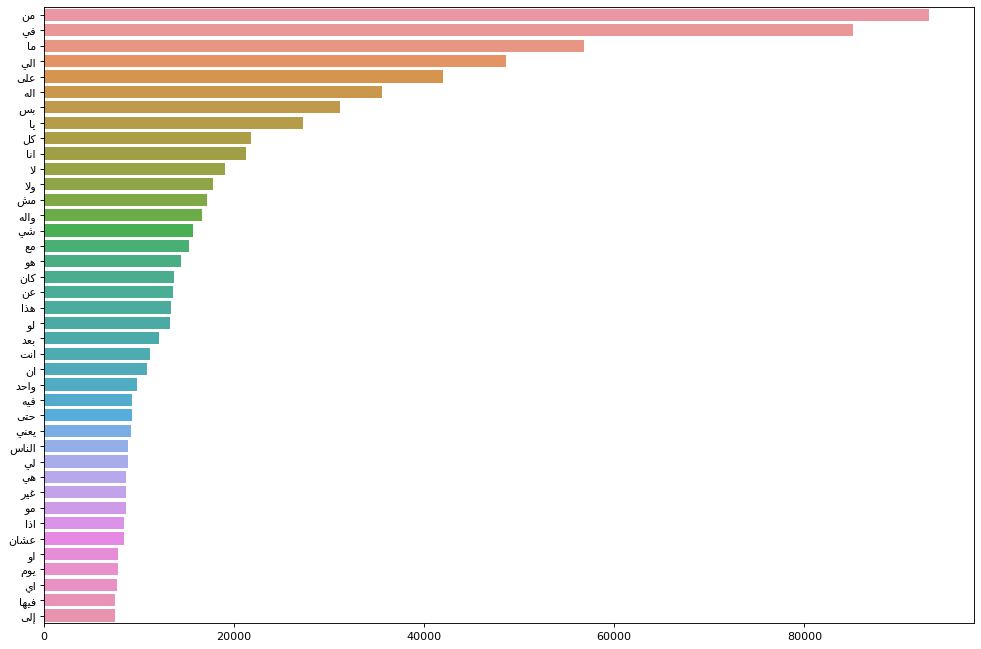

In [4]:
all_words = ' '.join([text for text in data['sentence']])
all_words = all_words.split()

Counter = Counter(all_words)
most_common = Counter.most_common()
x, y = [], []
for word, count in most_common[:40]:
    word=bidialg.get_display(arabic_reshaper.reshape(word))
    x.append(word)
    y.append(count)

plt.figure(figsize=(15, 10), dpi=80)
sns.barplot(x=y,y=x)

In [5]:
def freq_words_removal(text, lst_words):
    lst_text = text.split()
    if lst_words is not None:
        lst_text = [word for word in lst_text if word not in lst_words]
    text = " ".join(lst_text)
    return text

In [6]:
wrds = ['مع','لا','على','من','ما','في','الي','هو','انا','أنا','اله']
data["sentence_clean"] = data["sentence"].apply(lambda x: freq_words_removal(x, wrds))
data = data.fillna('')
data.head(10)

,sentence,dialect,sentence_clean
0,ياخي المدرب أختاره والمدرب دخله والمدرب بارك ا...,AE,ياخي المدرب أختاره والمدرب دخله والمدرب بارك ا...
1,شو الي قاعد يجري فالنصر يا أخوه خسر المباراة س...,AE,شو قاعد يجري فالنصر يا أخوه خسر المباراة سقطة ...
2,الي يبحث عن مشكلة الوصل راح يحصلها فالجولان,AE,يبحث عن مشكلة الوصل راح يحصلها فالجولان
3,انا مش معترض على تغير عامر الي دخل مكان عامر ا...,AE,مش معترض تغير عامر دخل مكان عامر المفترض ريان ...
4,تراجع مخيف في مستوى الحارس الكبير ماجد ناصر مش...,AE,تراجع مخيف مستوى الحارس الكبير ماجد ناصر مش ما...
5,يا بسومي عموري طلع بموافقة صاحب القرار مش بكيف...,AE,يا بسومي عموري طلع بموافقة صاحب القرار مش بكيف...
6,خل ينفعكم الي ينابح فالموسم الماضي صراخه وصل ش...,AE,خل ينفعكم ينابح فالموسم الماضي صراخه وصل شعم و...
7,لسه بدري عالشتويه قول إن شاءاله بس ما تطلع مشك...,AE,لسه بدري عالشتويه قول إن شاءاله بس تطلع مشكلة ...
8,ليش متشائم الفريق يوم ما يكون في حالته الفنيه ...,AE,ليش متشائم الفريق يوم يكون حالته الفنيه والذهن...
9,هذا الي انا محيرني,AE,هذا محيرني


<AxesSubplot: >

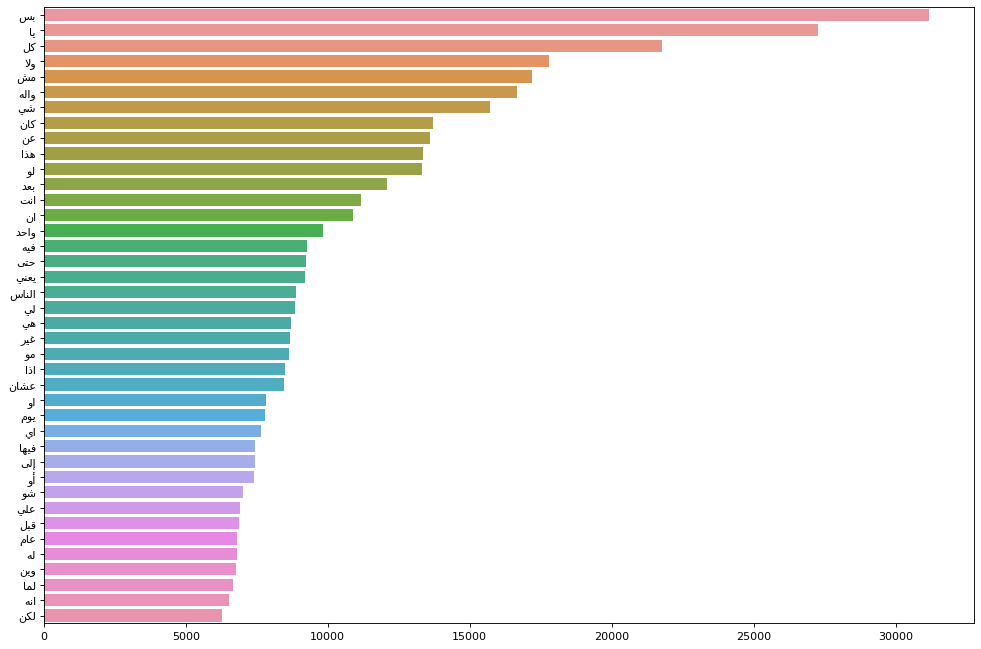

In [7]:
from collections import Counter

all_words = ' '.join([text for text in data['sentence_clean']])
all_words = all_words.split()

Counter = Counter(all_words)
most_common = Counter.most_common()
x, y = [], []
for word, count in most_common[:40]:
    word=bidialg.get_display(arabic_reshaper.reshape(word))
    x.append(word)
    y.append(count)

plt.figure(figsize=(15, 10), dpi=80)
sns.barplot(x=y,y=x)

In [8]:
data.to_csv('../data/new_arabic_dialect_dataset.csv', index = False)